In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from behavior_analysis import process_data as pd
import behavior_analysis as bd
from glob import glob
import os

%matplotlib inline


In [2]:
cageNum = "4058541."
home = "/Volumes/mplitt/VR/2AFC_V3/"

['/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_10__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_7__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_9__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_2__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_12__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_5__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_4__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_9_1__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_8__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_3__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_6__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_1__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.1/OneSidedCues_noservo_2_1__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/405

/Users/markplitt/repos/2AFC_VR/lick_data/2AFC_V3/behavior_analysis.py:98: RuntimeWarning: Mean of empty slice
  rRT_mu = [np.nanmean(rRT[i]) for i in range(len(rRT))]


['/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_5__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_9__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_2__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_1_1__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_10__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_7__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_7_1__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_1__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_6__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_11__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_8__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_3__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.3/OneSidedCues_noservo_4__Licks.txt']


/Users/markplitt/repos/2AFC_VR/lick_data/2AFC_V3/behavior_analysis.py:99: RuntimeWarning: Mean of empty slice
  lRT_mu = [np.nanmean(lRT[i]) for i in range(len(lRT))]


['/Volumes/mplitt/VR/2AFC_V3/4058541.4/OneSidedCues_noservo_4__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.4/OneSidedCues_noservo_8__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.4/OneSidedCues_noservo_3__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.4/OneSidedCues_noservo_6__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.4/OneSidedCues_noservo_1__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.4/OneSidedCues_noservo_1_1__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.4/OneSidedCues_noservo_2_1__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.4/OneSidedCues_noservo_7__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.4/OneSidedCues_noservo_2__Licks.txt', '/Volumes/mplitt/VR/2AFC_V3/4058541.4/OneSidedCues_noservo_5__Licks.txt']


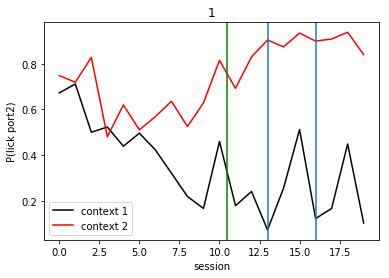

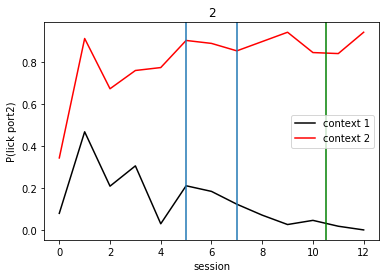

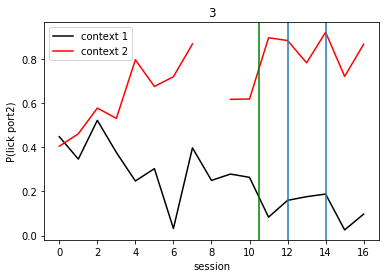

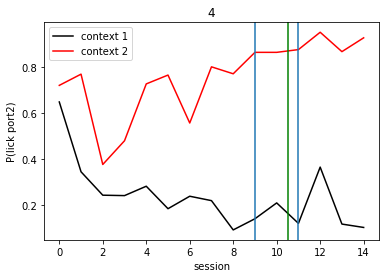

In [3]:

mice = ["1","2", "3", "4"]

for mouse in mice:
    
    
    oneSidedFiles = glob(home+cageNum+mouse+"/OneSidedCues_noservo_*Licks.txt")
    halfOneSidedFiles = glob(home+cageNum+mouse+"/HalfOneSidedCue_noservo_*Licks.txt")
    AFCTrainFiles = glob(home+cageNum+mouse+"/2AFC_Train_noservo_*Licks.txt")
    allFiles = [i for i in oneSidedFiles]
    print(allFiles)
    allFiles.extend(halfOneSidedFiles)
    allFiles.extend(AFCTrainFiles)
    
    fileBDays = [os.stat(path_to_file).st_birthtime for path_to_file in allFiles]
    sortedFiles = [x for _, x in sorted(zip(fileBDays,allFiles), key=lambda pair: pair[0])]
    sortedSessions = [i.split(home+cageNum+mouse+"/")[1].split("_Licks.txt")[0] for i in sortedFiles]
    c = pd(cageNum+mouse,sortedSessions,basedir='home')
    c.save_sessions()
    
    R,D = c.load_sessions()
    #print(R)
    f, ax = bd.plot_learning_curve(R,title=mouse)
    ax.axvline(len(oneSidedFiles)-1)
    ax.axvline(len(oneSidedFiles)+len(halfOneSidedFiles)-1)
    ax.axvline(10.5,color='green')
    

['2AFC_Test_noServo_0_', '2AFC_Test_noServo_1_', '2AFC_Test_noServo_2_', '2AFC_Test_noServo_3_']


/Users/markplitt/repos/2AFC_VR/lick_data/2AFC_V3/behavior_analysis.py:99: RuntimeWarning: Mean of empty slice
  lRT_mu = [np.nanmean(lRT[i]) for i in range(len(lRT))]


['2AFC_Test_noServo_0_', '2AFC_Test_noServo_1_', '2AFC_Test_noServo_2_']
['2AFC_Test_noServo_0_', '2AFC_Test_noServo_1_', '2AFC_Test_noServo_2_', '2AFC_Test_noServo_3_']


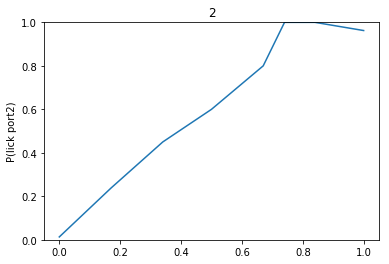

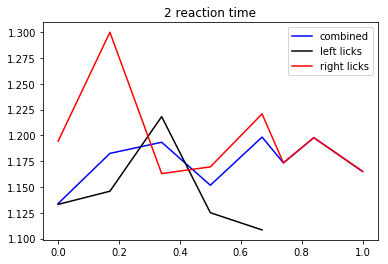

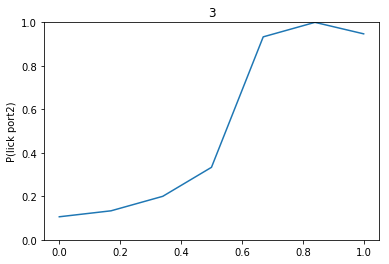

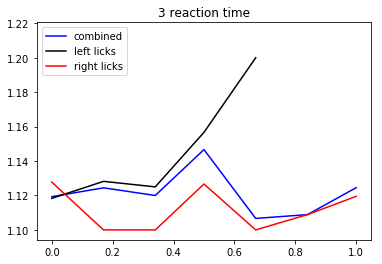

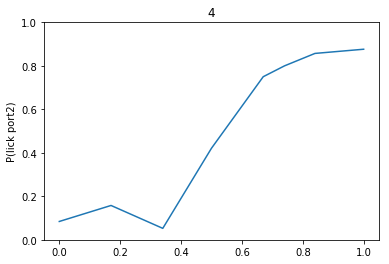

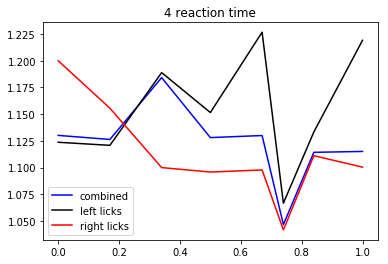

In [4]:

mice = [ "2","3", "4"]
for mouse in mice:
    allFiles = glob(home+cageNum+mouse+"/2AFC_Test_noServo_*Licks.txt")
    fileBDays = [os.stat(path_to_file).st_birthtime for path_to_file in allFiles]
    sortedFiles = [x for _, x in sorted(zip(fileBDays,allFiles), key=lambda pair: pair[0])]
    sortedSessions = [i.split(home+cageNum+mouse+"/")[1].split("_Licks.txt")[0] for i in sortedFiles]
    print(sortedSessions)
    c = pd(cageNum+mouse,sortedSessions,basedir='home')
    c.save_sessions()
    
    R,D = c.load_sessions()
    Rall,Dall = c.concatenate_sessions()
    #print(Rall)
    bd.psychometrics(Rall,title=mouse,plots=['psych','RT'])
    
    # speed 

    # looking at speed vs position
        # exclude reward time
    
    # second tower triggered speed, excluding trials in which the reward was within 50 cm of tower
    
    # speed on first half of the track as a function of morph\
    

In [ ]:


# speed 

# looking at speed vs position
    # exclude reward time
    
# second tower triggered speed, excluding trials in which the reward was within 50 cm of tower

In [ ]:
# probability of licking right given how far down the track the animal was when the lickport moved forward